# Licencia Notebook
Casting Inteligente: Algoritmos para la selección óptima de actores

Copyright (C) 2024  Alaix, Alvarado, Choconta & Martinez

Este archivo es parte de FilmCast.

FilmCast es software libre: puedes redistribuirlo y/o modificarlo bajo los términos de la Licencia Pública General de GNU tal como fue publicada por la Free Software Foundation, ya sea la versión 3 de la Licencia o cualquier versión posterior.

FilmCast se distribuye con la esperanza de que sea útil, pero SIN NINGUNA GARANTÍA; ni siquiera la garantía implícita de COMERCIABILIDAD o IDONEIDAD PARA UN PROPÓSITO PARTICULAR. Consulta la Licencia Pública General de GNU para más detalles.

Deberías haber recibido una copia de la Licencia Pública General de GNU junto con FilmCast. Si no, consulta https://www.gnu.org/licenses/.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/GPLv3_Logo.svg/1920px-GPLv3_Logo.svg.png" alt="GPL" width="400" height="200">

# Licencia Dataset

Copyright (C) Anthony Therrien [Kaggle](https://www.kaggle.com/datasets/anthonytherrien/a-synthetic-journey-through-10000-actor-profiles/data).

Bajo la licencia CC BY-SA 4.0: Attribution-ShareAlike 4.0 International

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/CC_BY-SA_icon.svg/1200px-CC_BY-SA_icon.svg.png" alt="CC" width="380" height="125">

# Notebook Final

## Carga del set de datos

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Functions import df_loader, plotBar, plotBox, plotScatter, plotPie
import seaborn as sns
import plotly.figure_factory as ff 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import joblib


In [132]:
df = pd.read_csv('Actores.csv', delimiter=';')
df

Name  Age  Gender Nationality  Years Active  \
0          Anthony Vaughn   19  Female         USA             1   
1           Justin Osborn   48    Male         USA            19   
2              Sandra Kim   49    Male         USA            23   
3               Mark Hahn   41  Female         USA            15   
4             Julie Brown   38    Male         USA            19   
...                   ...  ...     ...         ...           ...   
12484  Christopher Romero   46    Male         USA            19   
12485       Joshua Holmes   29  Female         USA            11   
12486       James Johnson   38    Male         USA            12   
12487      Michael Rogers   20  Female      Canada             2   
12488    Jeffrey Williams   59    Male         USA            17   

      Genre Specialization  Beauty  Skill Level Education Level  Award Wins  \
0                   Comedy    9.56         8.24      University           7   
1                    Drama    7.88         9.61         College          10   
2                   Sci-Fi    7.43         9.76         College          12   
3                   Sci-Fi    8.08        15.55        Graduate           9   
4                   Action    6.04         9.74      University          11   
...                    ...     ...          ...             ...         ...   
12484               Comedy    5.79        13.63      University          13   
12485                Drama    7.59        14.89      University           9   
12486               Action    5.57         6.93        Graduate           7   
12487                Drama    7.15         6.66        Graduate           6   
12488               Action    5.46         8.98     High School          11   

       Media Mentions  Social Media Followers  Social Media Likes  \
0                  52                   15678                4914   
1                  37                   18420                5378   
2                  46                   17382                5033   
3                  42                   16742                5005   
4                  38                   13428                4662   
...               ...                     ...                 ...   
12484              35                   16560                5285   
12485              40                   16762                5266   
12486              30                   13249                4505   
12487              39                   17489                5249   
12488              48                   19163                5605   

       Network Size      Income  
0                22   434056.09  
1                30  1188216.47  
2                23  1730313.22  
3                25   818967.94  
4                22   974068.97  
...             ...         ...  
12484            26  1415564.10  
12485            18   472303.27  
12486            24   564631.95  
12487            23   350355.41  
12488            31  1242619.92  

[12489 rows x 15 columns]

## Exploración preliminar del set de datos

### Exploración de los primeros 5 registros del set de datos

In [93]:
df.head(5)

Name  Age  Gender Nationality  Years Active Genre Specialization  \
0  Anthony Vaughn   19  Female         USA             1               Comedy   
1   Justin Osborn   48    Male         USA            19                Drama   
2      Sandra Kim   49    Male         USA            23               Sci-Fi   
3       Mark Hahn   41  Female         USA            15               Sci-Fi   
4     Julie Brown   38    Male         USA            19               Action   

   Beauty  Skill Level Education Level  Award Wins  Media Mentions  \
0    9.56         8.24      University           7              52   
1    7.88         9.61         College          10              37   
2    7.43         9.76         College          12              46   
3    8.08        15.55        Graduate           9              42   
4    6.04         9.74      University          11              38   

   Social Media Followers  Social Media Likes  Network Size      Income  
0                   15678                4914            22   434056.09  
1                   18420                5378            30  1188216.47  
2                   17382                5033            23  1730313.22  
3                   16742                5005            25   818967.94  
4                   13428                4662            22   974068.97

### Exploración de los últimos 5 registros del set de datos

In [94]:
df.tail(5)

Name  Age  Gender Nationality  Years Active  \
12484  Christopher Romero   46    Male         USA            19   
12485       Joshua Holmes   29  Female         USA            11   
12486       James Johnson   38    Male         USA            12   
12487      Michael Rogers   20  Female      Canada             2   
12488    Jeffrey Williams   59    Male         USA            17   

      Genre Specialization  Beauty  Skill Level Education Level  Award Wins  \
12484               Comedy    5.79        13.63      University          13   
12485                Drama    7.59        14.89      University           9   
12486               Action    5.57         6.93        Graduate           7   
12487                Drama    7.15         6.66        Graduate           6   
12488               Action    5.46         8.98     High School          11   

       Media Mentions  Social Media Followers  Social Media Likes  \
12484              35                   16560                5285   
12485              40                   16762                5266   
12486              30                   13249                4505   
12487              39                   17489                5249   
12488              48                   19163                5605   

       Network Size      Income  
12484            26  1415564.10  
12485            18   472303.27  
12486            24   564631.95  
12487            23   350355.41  
12488            31  1242619.92

### Número de registros del set de datos

In [95]:
df.shape[0]

12489

### Número de atributos del set de datos

In [96]:
print(df.shape[1])
df.columns

15


Index(['Name', 'Age', 'Gender', 'Nationality', 'Years Active',
       'Genre Specialization', 'Beauty', 'Skill Level', 'Education Level',
       'Award Wins', 'Media Mentions', 'Social Media Followers',
       'Social Media Likes', 'Network Size', 'Income'],
      dtype='object')

### Tipo de dato de cada atributo

In [97]:
df.dtypes

Name                       object
Age                         int64
Gender                     object
Nationality                object
Years Active                int64
Genre Specialization       object
Beauty                    float64
Skill Level               float64
Education Level            object
Award Wins                  int64
Media Mentions              int64
Social Media Followers      int64
Social Media Likes          int64
Network Size                int64
Income                    float64
dtype: object

### Atributos categóricos y numéricos del *dataset*

In [98]:
print("Atributos numéricos:\n", df.select_dtypes(include=['number']).columns)
print("Atributos categóricos:\n", df.select_dtypes(include=['object']).columns)

Atributos numéricos:
 Index(['Age', 'Years Active', 'Beauty', 'Skill Level', 'Award Wins',
       'Media Mentions', 'Social Media Followers', 'Social Media Likes',
       'Network Size', 'Income'],
      dtype='object')
Atributos categóricos:
 Index(['Name', 'Gender', 'Nationality', 'Genre Specialization',
       'Education Level'],
      dtype='object')


### Atributos discretos y continuos del dataset

Los atributos discretos son aquellos que toman un número finito o contable de valores y estos generalmente son enteros o categorías que no se pueden dividir en fracciones más pequeñas, en nuestro caso  el `nombre`(cadena de texto categórica), la `edad`(número entero), el `genero`(Female y Male), `Nacionalidad`(USA y Canada), `años activo`(número entero), `Genero en el que se especializa`('Comedy', 'Drama', etc.), `nivel educativo`(University,College, Graduate,High School), `Award Wins`(número entero), `Media Mentions`(número entero), `Social Media Followers`(número entero), `Network Size`(número entero), `Social Media Likes`(número entero).

Los atributos continuos son aquellos que pueden tomar cualquier valor en un rango, generalmente con posibilidad de tener valores decimales como en este caso los atributos `Beauty`(se mide en una escala de habilidad con valores intermedios), `Skill Level`(se mide en una escala de habilidad con valores intermedios), `Income`(cualquier valor en un rango y no se limita a enteros).

### Tipo de dataset que se tiene para el proyecto

Este *dataset* proviene de [Kaggle](https://www.kaggle.com/datasets/anthonytherrien/a-synthetic-journey-through-10000-actor-profiles/data) bajo una licencia pública, permitiendo su modificación, adaptación, y contruir nuevo conocimiento a partir de estos datos. Entrando en materia de datos, se tienen 15 columnas o variables que se presentan a continuación, indicando su tipo de dato, si es categórico, numérico, discreto, o continuo.

- `Name` | String | Categórico.
- `Age` | Entero | Numérico Discreto.
- `Gender` | String | Categórico.
- `Nationality` | String | Categórico.
- `Years Active` | Entero | Numérico Discreto.
- `Genre Specialization` | String | Categórico.
- `Beauty` | Flotante | Numérico Continuo.
- `Skill Level` | Flotante | Numérico Continuo.
- `Education Level` | String | Categórico.
- `Award Wins` | Entero | Numérico Discreto.
- `Media Mentions` | Entero | Numérico Discreto.
- `Social Media Followers` | Entero | Numérico Discreto.
- `Social Media Likes` | Entero | Numérico Discreto.
- `Network Size` | Entero | Numérico Discreto.
- `Income` | Flotante | Numérico Continuo.

También posee un total de 12489 registros, todo en formato `.csv`. En conclusión, se posee un *dataset* con datos categóricos, numéricos discretos y continuos. Teniendo una diversidad en los datos.

## Recuento estadístico

### Years Active

Promedio de años activos: 12.404916326367204
Mediana de años activos: 13.0


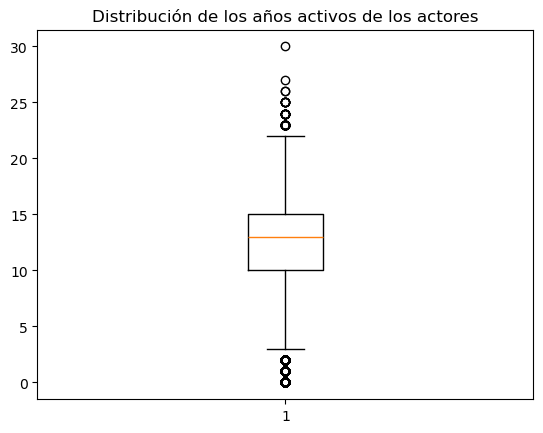

Minimo de años activos: 0
Máximo de años activos: 30
Primer cuartil : 10.0
Tercer cuartil : 15.0
Rango intercuartil : 5.0
Desviación estándar de los años activos: 4.607368639793933


In [99]:
# Seleccione aquí la columna para el análisis.
años = df['Years Active']

# Calcule aquí el valor promedio.
promedio_años = años.mean()
print("Promedio de años activos:", promedio_años)

# Calcule aquí la mediana.
mediana_años = años.median()
print("Mediana de años activos:", mediana_años)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(años)
plt.title('Distribución de los años activos de los actores')
plt.show()

# Calcule aquí el valor mínimo.
años_min = años.min()
print("Minimo de años activos:", años_min)

# Calcule aquí el valor máximo.
maximo_años = años.max()
print("Máximo de años activos:", maximo_años)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(años,25)
tercer_cuartil=np.percentile(años,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)

# Calcule aquí la desviación estándar.
desviacion_estandar = años.std()
print("Desviación estándar de los años activos:", desviacion_estandar)


Para los años activos de los actores, el 50% poseen 13 años o menos, a su vez, el otro 50% tiene más de estos años activo en la industria. Los datos se encuentran en un rango de 0 a 30 años, contando con un *dataset* de actores sin experiencia a otros con mucha. La mayoría de los actores poseen entre 10 y 15 años de experiencia. Sin embargo, existen valores atípicos, actores que poseen más de 22 años, y otros con menos de 4.

### EDAD

Promedio de edad: 36.83233245255825
Mediana de edad: 36.0


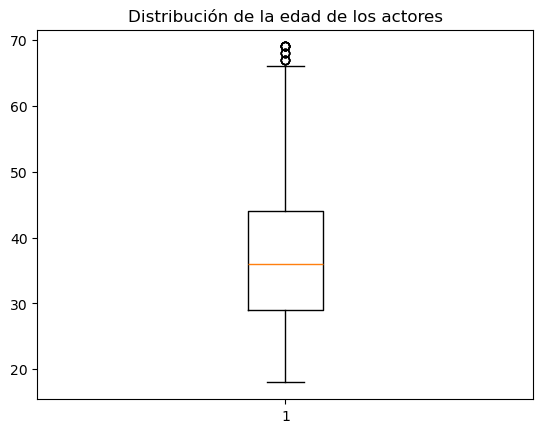

Edad mínima: 18
Edad máxima: 69
Primer cuartil : 29.0
Tercer cuartil : 44.0
Rango intercuartil : 15.0
Desviación estándar de la edad: 10.074581362741656


In [100]:
# Seleccione aquí la columna para el análisis.
edad = df['Age']

# Calcule aquí el valor promedio.
promedio_edad = edad.mean()
print("Promedio de edad:", promedio_edad)

# Calcule aquí la mediana.
mediana_edad = edad.median()
print("Mediana de edad:", mediana_edad)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(edad)
plt.title('Distribución de la edad de los actores')
plt.show()

# Calcule aquí el valor mínimo.
edad_min = edad.min()
print("Edad mínima:", edad_min)

# Calcule aquí el valor máximo.
maximo_edad = edad.max()
print("Edad máxima:", maximo_edad)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(edad,25)
tercer_cuartil=np.percentile(edad,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)

# Calcule aquí la desviación estándar.
desviacion_estandar = edad.std()
print("Desviación estándar de la edad:", desviacion_estandar)

Para la edad de los actores, el 50% poseen 36 años o menos, a su vez, el otro 50% tiene más de esta edad. Los datos se encuentran en un rango de 18 a 69 años, la mayoría de los actores poseen entre 29 y 44 años. Sin embargo, existen valores atípicos, actores que poseen más de 65 años.

### Award Wins


Promedio de premios ganados: 8.241492513411803
Mediana de premios ganados: 8.0


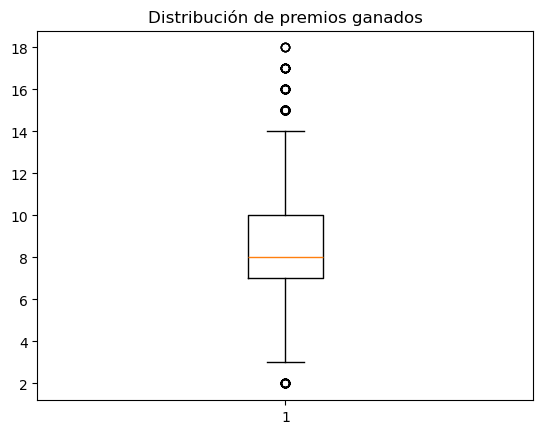

Mínimo de premios ganados: 2
Máximo de premios ganados: 18
Primer cuartil : 7.0
Tercer cuartil : 10.0
Rango intercuartil : 3.0
Desviación estándar de los premios ganados: 2.3094182736386877


In [101]:
# Seleccione aquí la columna para el análisis.
wins = df['Award Wins']

# Calcule aquí el valor promedio.
promedio_wins = wins.mean()
print("Promedio de premios ganados:", promedio_wins)

# Calcule aquí la mediana.
mediana_wins = wins.median()
print("Mediana de premios ganados:", mediana_wins)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(wins)
plt.title('Distribución de premios ganados')
plt.show()

# Calcule aquí el valor mínimo.
minimo_wins = wins.min()
print("Mínimo de premios ganados:", minimo_wins)

# Calcule aquí el valor máximo.
maximo_wins = wins.max()
print("Máximo de premios ganados:", maximo_wins)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(wins,25)
tercer_cuartil=np.percentile(wins,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)


# Calcule aquí la desviación estándar.
desviacion_estandar = wins.std()
print("Desviación estándar de los premios ganados:", desviacion_estandar)

Para la cantidad de premios ganados, el 50% de los actores poseen 8 premios o menos, a su vez, el otro 50% tiene más de este número. Los datos se encuentran en un rango de 2 a 18 premios, lo que quiere decir que todos los actores del *dataset* tienen algún tipo de premio, la mayoría de los actores poseen entre 7 y 10 premios. Sin embargo, existen valores atípicos, actores que poseen más de 14 premios y otros que tienen menos de 3.

### Media Mentions

Promedio de menciones en medios: 38.15277444150853
Mediana de menciones en medios: 38.0


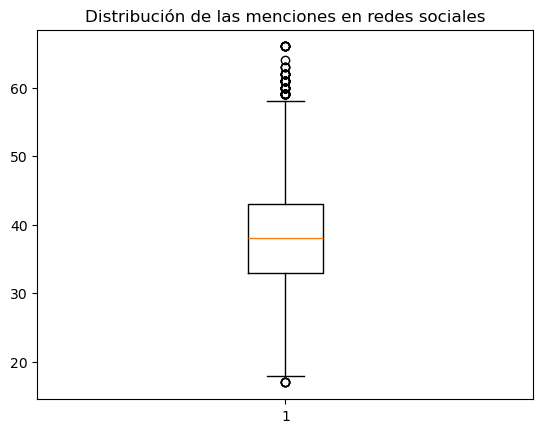

Mínimo de menciones en medios: 17
Máximo de menciones en medios: 66
Primer cuartil : 33.0
Tercer cuartil : 43.0
Rango intercuartil : 10.0
Desviación estándar de las menciones en medios: 7.164023367551682


In [102]:
# Seleccione aquí la columna para el análisis.
mentions = df['Media Mentions']

# Calcule aquí el valor promedio.
promedio_mentions = mentions.mean()
print("Promedio de menciones en medios:", promedio_mentions)

# Calcule aquí la mediana.
mediana_mentions = mentions.median()
print("Mediana de menciones en medios:", mediana_mentions)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(mentions)
plt.title('Distribución de las menciones en redes sociales')
plt.show()

# Calcule aquí el valor mínimo.
minimo_mentions = mentions.min()
print("Mínimo de menciones en medios:", minimo_mentions)

# Calcule aquí el valor máximo.
maximo_mentions = mentions.max()
print("Máximo de menciones en medios:", maximo_mentions)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(mentions,25)
tercer_cuartil=np.percentile(mentions,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)

# Calcule aquí la desviación estándar.
desviacion_estandar = mentions.std()
print("Desviación estándar de las menciones en medios:", desviacion_estandar)


Para las menciones en medios, el 50% de los actores poseen 38 menciones o menos, a su vez, el otro 50% tiene más de este número. Los datos se encuentran en un rango de 17 a 66 menciones en medios, la mayoría de los actores poseen entre 33 y 43 menciones en medios. Sin embargo, existen valores atípicos, actores que poseen más de 60 menciones y otros que tienen menos de 20.

### Social Media Followers

Promedio de seguidores en redes sociales: 16583.698694851468
Mediana de seguidores en redes sociales: 16518.0


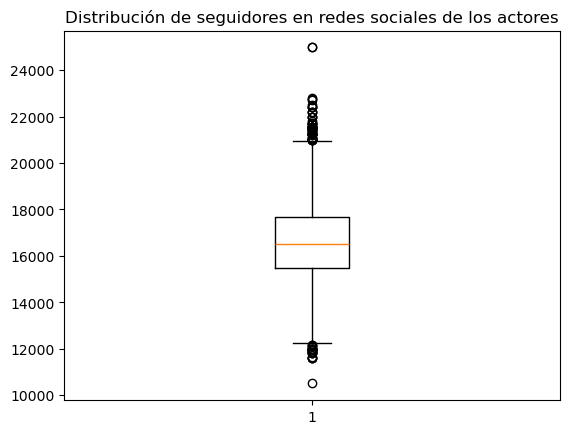

Mínimo de seguidores en redes sociales: 10507
Máximo de seguidores en redes sociales: 24976
Primer cuartil : 15484.0
Tercer cuartil : 17675.0
Rango intercuartil : 2191.0
Desviación estándar de los seguidores en redes sociales: 1610.9462192349927


In [103]:
# Seleccione aquí la columna para el análisis.
followers = df['Social Media Followers']

# Calcule aquí el valor promedio.
promedio_followers = followers.mean()
print("Promedio de seguidores en redes sociales:", promedio_followers)

# Calcule aquí la mediana.
mediana_followers = followers.median()
print("Mediana de seguidores en redes sociales:", mediana_followers)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(followers)
plt.title('Distribución de seguidores en redes sociales de los actores')
plt.show()

# Calcule aquí el valor mínimo.
minimo_followers = followers.min()
print("Mínimo de seguidores en redes sociales:", minimo_followers)

# Calcule aquí el valor máximo.
maximo_followers = followers.max()
print("Máximo de seguidores en redes sociales:", maximo_followers)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(followers,25)
tercer_cuartil=np.percentile(followers,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)

# Calcule aquí la desviación estándar.
desviacion_estandar = followers.std()
print("Desviación estándar de los seguidores en redes sociales:", desviacion_estandar)


Para los seguidores, el 50% de los actores poseen 16518 seguidores o menos, a su vez, el otro 50% tiene más de este número. Los datos se encuentran en un rango de 10507 a 24976 seguidores, la mayoría de los actores poseen seguidores entre 15484 y 17675. Sin embargo, existen valores atípicos, actores que poseen más de 24000 seguidores y otros que tienen menos de 12000.

## Análisis Gráfico


### Scatter Plots:

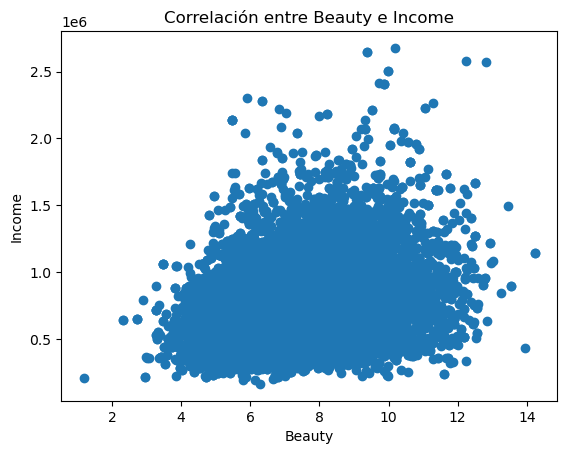

In [104]:
plt.scatter(df['Beauty'], df['Income'])
plt.xlabel('Beauty')
plt.ylabel('Income')
plt.title('Correlación entre Beauty e Income')
plt.show()

Al analizar la relacion que existe entre las variables de "belleza" y "ingreso"; se evidencio que:
- No existe ninuna correlacion lineal 
- Existe una dispersion muy grande de los datos
  
Segun lo anterior se pude concluir que:
- no existe una relacion objetiva entre ambas variables
- La belleza no es predictor o un determinante de los ingresos del actor

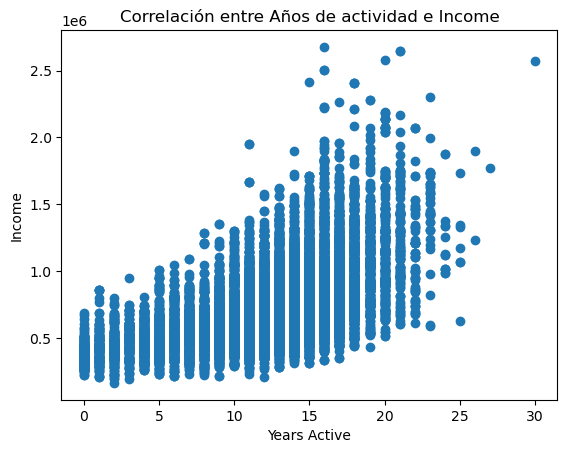

In [105]:
plt.scatter(df['Years Active'], df['Income'])
plt.xlabel('Years Active')
plt.ylabel('Income')
plt.title('Correlación entre Años de actividad e Income')
plt.show()

### Bar Plots

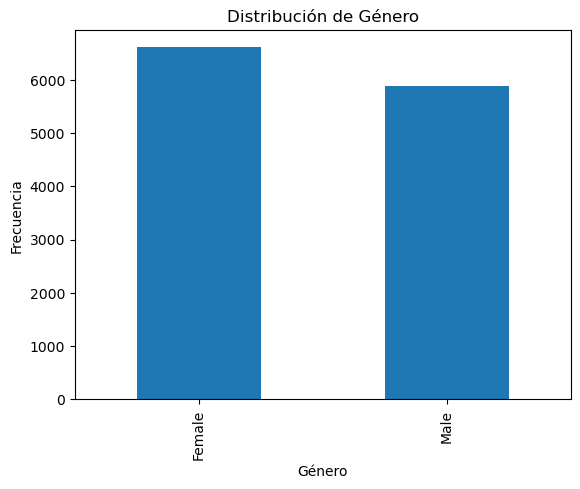

In [106]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


Cada barra representa la cantidad de ndividuos que pertenecen a cada género en el conjunto de datos analizado.
De la grafica podemos concluir que:
- La barra correpondiente al genero femenino es ligeramente mayor encompraracion, con su contra parte 

### Line Plots

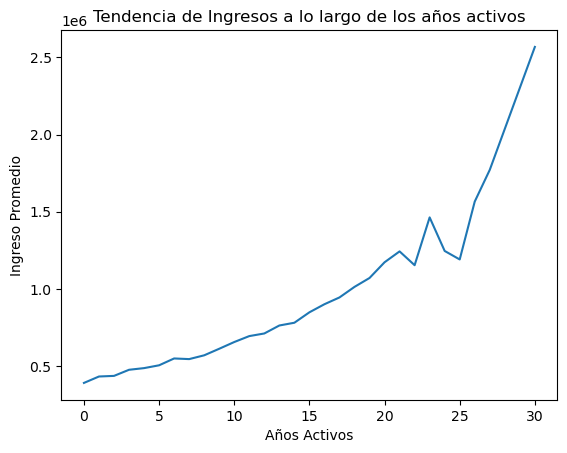

In [107]:
df.groupby('Years Active')['Income'].mean().plot(kind='line')
plt.title('Tendencia de Ingresos a lo largo de los años activos')
plt.xlabel('Años Activos')
plt.ylabel('Ingreso Promedio')
plt.show()

De la anterior grafica, podemos observar que existe una tendecia general ascendente, lo cual suguiere que existe una correlacion positiva entre  los años de actividad y los ingresos promedio
lo que quiere decir que a a mayor se "los años de actividad", mayor ingresos

Un factor a destacar es la presencia en una variacion entre alrededro de los 20-25 años

### Pie Plots

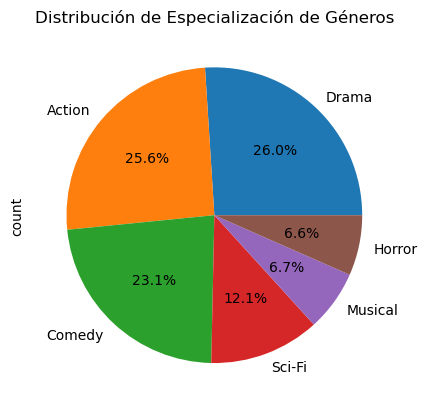

In [108]:
df['Genre Specialization'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Especialización de Géneros')
plt.show()

Podemos observar que los generos drama, comedia y accion, representan aproximadamente el 75% del mercado de los actores del data set, esto puede reflejar una alta demanda en estos tipos de produccciones en la industria

### Histogramas

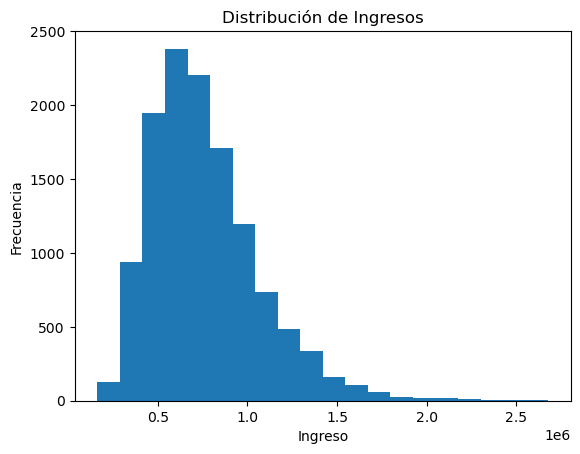

In [109]:
df['Income'].plot(kind='hist', bins=20)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()


Podemos analisar que:
- Existe una distribución está claramente sesgada hacia la derecha, lo que representa que la gran mayoria de actores tienen ingresos bajos
- La moda de los datos lo encontramos al rededor de las 500.000 unidades

### Box Plots

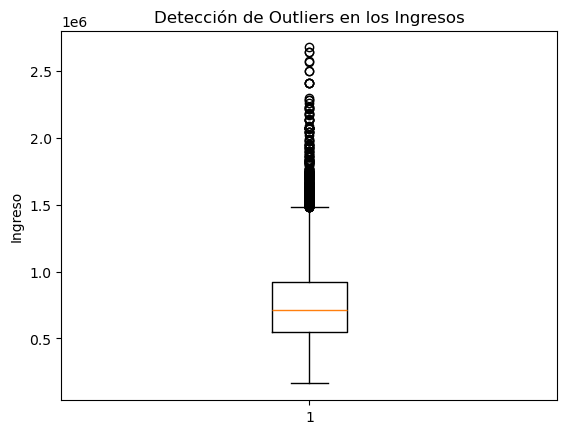

In [110]:
plt.boxplot(df['Income'])
plt.title('Detección de Outliers en los Ingresos')
plt.ylabel('Ingreso')
plt.show()

De la grafica de feterccion de datos atipicos se puede concluir que:
Existe una Distribución Asimetrica; ya que la caja se encuentra mas cerca de limite inferior y los datos atipicos los encontamos por encima de la caja. Esto nos da a entender que la distribución de los ingresos es asimétrica positiva, es decir, hay una cola larga hacia la derecha con algunos ingresos muy altos


## Limpieza del *dataset*

### Limpieza de duplicados

In [111]:
df

Name  Age  Gender Nationality  Years Active  \
0          Anthony Vaughn   19  Female         USA             1   
1           Justin Osborn   48    Male         USA            19   
2              Sandra Kim   49    Male         USA            23   
3               Mark Hahn   41  Female         USA            15   
4             Julie Brown   38    Male         USA            19   
...                   ...  ...     ...         ...           ...   
12484  Christopher Romero   46    Male         USA            19   
12485       Joshua Holmes   29  Female         USA            11   
12486       James Johnson   38    Male         USA            12   
12487      Michael Rogers   20  Female      Canada             2   
12488    Jeffrey Williams   59    Male         USA            17   

      Genre Specialization  Beauty  Skill Level Education Level  Award Wins  \
0                   Comedy    9.56         8.24      University           7   
1                    Drama    7.88         9.61         College          10   
2                   Sci-Fi    7.43         9.76         College          12   
3                   Sci-Fi    8.08        15.55        Graduate           9   
4                   Action    6.04         9.74      University          11   
...                    ...     ...          ...             ...         ...   
12484               Comedy    5.79        13.63      University          13   
12485                Drama    7.59        14.89      University           9   
12486               Action    5.57         6.93        Graduate           7   
12487                Drama    7.15         6.66        Graduate           6   
12488               Action    5.46         8.98     High School          11   

       Media Mentions  Social Media Followers  Social Media Likes  \
0                  52                   15678                4914   
1                  37                   18420                5378   
2                  46                   17382                5033   
3                  42                   16742                5005   
4                  38                   13428                4662   
...               ...                     ...                 ...   
12484              35                   16560                5285   
12485              40                   16762                5266   
12486              30                   13249                4505   
12487              39                   17489                5249   
12488              48                   19163                5605   

       Network Size      Income  
0                22   434056.09  
1                30  1188216.47  
2                23  1730313.22  
3                25   818967.94  
4                22   974068.97  
...             ...         ...  
12484            26  1415564.10  
12485            18   472303.27  
12486            24   564631.95  
12487            23   350355.41  
12488            31  1242619.92  

[12489 rows x 15 columns]

### Partir dataset en variables categóricas y numéricas

In [112]:
df_cat = df[[x for x in df.columns if df.dtypes[x] == 'O' and x != 'Name']]
df_num = df[[x for x in df.columns if df.dtypes[x] == 'int64' or df.dtypes[x] == 'float64']]

In [113]:
print(df_cat.columns, '\n', df_num.columns)

Index(['Gender', 'Nationality', 'Genre Specialization', 'Education Level'], dtype='object') 
 Index(['Age', 'Years Active', 'Beauty', 'Skill Level', 'Award Wins',
       'Media Mentions', 'Social Media Followers', 'Social Media Likes',
       'Network Size', 'Income'],
      dtype='object')


### OneHotEncoder para variables categóricas

In [114]:
encoder = OneHotEncoder(sparse_output=False)

In [115]:
encoded_df = encoder.fit_transform(df_cat)
nombres = encoder.get_feature_names_out(df_cat.columns)
df_OHE = pd.DataFrame(encoded_df, columns=nombres)
df_OHE.sample(5)

Gender_Female  Gender_Male  Nationality_Canada  Nationality_USA  \
6906             0.0          1.0                 0.0              1.0   
3091             0.0          1.0                 0.0              1.0   
5729             0.0          1.0                 0.0              1.0   
2574             0.0          1.0                 0.0              1.0   
11423            0.0          1.0                 0.0              1.0   

       Genre Specialization_Action  Genre Specialization_Comedy  \
6906                           1.0                          0.0   
3091                           1.0                          0.0   
5729                           0.0                          0.0   
2574                           1.0                          0.0   
11423                          0.0                          0.0   

       Genre Specialization_Drama  Genre Specialization_Horror  \
6906                          0.0                          0.0   
3091                          0.0                          0.0   
5729                          1.0                          0.0   
2574                          0.0                          0.0   
11423                         0.0                          0.0   

       Genre Specialization_Musical  Genre Specialization_Sci-Fi  \
6906                            0.0                          0.0   
3091                            0.0                          0.0   
5729                            0.0                          0.0   
2574                            0.0                          0.0   
11423                           1.0                          0.0   

       Education Level_College  Education Level_Graduate  \
6906                       0.0                       0.0   
3091                       0.0                       0.0   
5729                       0.0                       0.0   
2574                       0.0                       1.0   
11423                      0.0                       0.0   

       Education Level_High School  Education Level_University  
6906                           0.0                         1.0  
3091                           0.0                         1.0  
5729                           0.0                         1.0  
2574                           0.0                         0.0  
11423                          0.0                         1.0

Después de pasar por la función One Hot-Encoder, la cantidad de variables incrementa a 14. Las cuales son:
- `Gender_Female`
- `Gender_Male`
- `Nationality_Canada`
- `Nationality_USA`
- `Genre Specialization_Action`
- `Genre Specialization_Comedy`
- `Genre Specialization_Drama`
- `Genre Specialization_Horror`
- `Genre Specialization_Musical`
- `Genre Specialization_Sci-Fi`
- `Education Level_College`
- `Education Level_Graduate`
- `Education Level_High School`
- `Education Level_University`

### Unificar ambos dataframe

In [116]:
df = pd.concat([df['Name'], df_num, df_OHE], axis=1)
df.tail(5)

Name  Age  Years Active  Beauty  Skill Level  Award Wins  \
12484  Christopher Romero   46            19    5.79        13.63          13   
12485       Joshua Holmes   29            11    7.59        14.89           9   
12486       James Johnson   38            12    5.57         6.93           7   
12487      Michael Rogers   20             2    7.15         6.66           6   
12488    Jeffrey Williams   59            17    5.46         8.98          11   

       Media Mentions  Social Media Followers  Social Media Likes  \
12484              35                   16560                5285   
12485              40                   16762                5266   
12486              30                   13249                4505   
12487              39                   17489                5249   
12488              48                   19163                5605   

       Network Size  ...  Genre Specialization_Action  \
12484            26  ...                          0.0   
12485            18  ...                          0.0   
12486            24  ...                          1.0   
12487            23  ...                          0.0   
12488            31  ...                          1.0   

       Genre Specialization_Comedy  Genre Specialization_Drama  \
12484                          1.0                         0.0   
12485                          0.0                         1.0   
12486                          0.0                         0.0   
12487                          0.0                         1.0   
12488                          0.0                         0.0   

       Genre Specialization_Horror  Genre Specialization_Musical  \
12484                          0.0                           0.0   
12485                          0.0                           0.0   
12486                          0.0                           0.0   
12487                          0.0                           0.0   
12488                          0.0                           0.0   

       Genre Specialization_Sci-Fi  Education Level_College  \
12484                          0.0                      0.0   
12485                          0.0                      0.0   
12486                          0.0                      0.0   
12487                          0.0                      0.0   
12488                          0.0                      0.0   

       Education Level_Graduate  Education Level_High School  \
12484                       0.0                          0.0   
12485                       0.0                          0.0   
12486                       1.0                          0.0   
12487                       1.0                          0.0   
12488                       0.0                          1.0   

       Education Level_University  
12484                         1.0  
12485                         1.0  
12486                         0.0  
12487                         0.0  
12488                         0.0  

[5 rows x 25 columns]

In [117]:
df

Name  Age  Years Active  Beauty  Skill Level  Award Wins  \
0          Anthony Vaughn   19             1    9.56         8.24           7   
1           Justin Osborn   48            19    7.88         9.61          10   
2              Sandra Kim   49            23    7.43         9.76          12   
3               Mark Hahn   41            15    8.08        15.55           9   
4             Julie Brown   38            19    6.04         9.74          11   
...                   ...  ...           ...     ...          ...         ...   
12484  Christopher Romero   46            19    5.79        13.63          13   
12485       Joshua Holmes   29            11    7.59        14.89           9   
12486       James Johnson   38            12    5.57         6.93           7   
12487      Michael Rogers   20             2    7.15         6.66           6   
12488    Jeffrey Williams   59            17    5.46         8.98          11   

       Media Mentions  Social Media Followers  Social Media Likes  \
0                  52                   15678                4914   
1                  37                   18420                5378   
2                  46                   17382                5033   
3                  42                   16742                5005   
4                  38                   13428                4662   
...               ...                     ...                 ...   
12484              35                   16560                5285   
12485              40                   16762                5266   
12486              30                   13249                4505   
12487              39                   17489                5249   
12488              48                   19163                5605   

       Network Size  ...  Genre Specialization_Action  \
0                22  ...                          0.0   
1                30  ...                          0.0   
2                23  ...                          0.0   
3                25  ...                          0.0   
4                22  ...                          1.0   
...             ...  ...                          ...   
12484            26  ...                          0.0   
12485            18  ...                          0.0   
12486            24  ...                          1.0   
12487            23  ...                          0.0   
12488            31  ...                          1.0   

       Genre Specialization_Comedy  Genre Specialization_Drama  \
0                              1.0                         0.0   
1                              0.0                         1.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
12484                          1.0                         0.0   
12485                          0.0                         1.0   
12486                          0.0                         0.0   
12487                          0.0                         1.0   
12488                          0.0                         0.0   

       Genre Specialization_Horror  Genre Specialization_Musical  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
12484                          0.0                           0.0   
12485                          0.0                           0.0   
12486                          0.0                           0.0   
12487                          0.0                           

### Crear columna index y reordenar estas mismas

In [118]:
df['Index'] = range(1, df.shape[0] + 1)
df

Name  Age  Years Active  Beauty  Skill Level  Award Wins  \
0          Anthony Vaughn   19             1    9.56         8.24           7   
1           Justin Osborn   48            19    7.88         9.61          10   
2              Sandra Kim   49            23    7.43         9.76          12   
3               Mark Hahn   41            15    8.08        15.55           9   
4             Julie Brown   38            19    6.04         9.74          11   
...                   ...  ...           ...     ...          ...         ...   
12484  Christopher Romero   46            19    5.79        13.63          13   
12485       Joshua Holmes   29            11    7.59        14.89           9   
12486       James Johnson   38            12    5.57         6.93           7   
12487      Michael Rogers   20             2    7.15         6.66           6   
12488    Jeffrey Williams   59            17    5.46         8.98          11   

       Media Mentions  Social Media Followers  Social Media Likes  \
0                  52                   15678                4914   
1                  37                   18420                5378   
2                  46                   17382                5033   
3                  42                   16742                5005   
4                  38                   13428                4662   
...               ...                     ...                 ...   
12484              35                   16560                5285   
12485              40                   16762                5266   
12486              30                   13249                4505   
12487              39                   17489                5249   
12488              48                   19163                5605   

       Network Size  ...  Genre Specialization_Comedy  \
0                22  ...                          1.0   
1                30  ...                          0.0   
2                23  ...                          0.0   
3                25  ...                          0.0   
4                22  ...                          0.0   
...             ...  ...                          ...   
12484            26  ...                          1.0   
12485            18  ...                          0.0   
12486            24  ...                          0.0   
12487            23  ...                          0.0   
12488            31  ...                          0.0   

       Genre Specialization_Drama  Genre Specialization_Horror  \
0                             0.0                          0.0   
1                             1.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
...                           ...                          ...   
12484                         0.0                          0.0   
12485                         1.0                          0.0   
12486                         0.0                          0.0   
12487                         1.0                          0.0   
12488                         0.0                          0.0   

       Genre Specialization_Musical  Genre Specialization_Sci-Fi  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          1.0   
3                               0.0                          1.0   
4                               0.0                          0.0   
...                             ...                          ...   
12484                           0.0                          0.0   
12485                           0.0                          0.0   
12486                           0.0                          0.0   
12487                           0.0                          

In [119]:
column_to_move = 'Index'
columns = [column_to_move] + [col for col in df.columns if col != column_to_move]

# Reorder the DataFrame
df = df[columns]

In [120]:
df

Index                Name  Age  Years Active  Beauty  Skill Level  \
0          1      Anthony Vaughn   19             1    9.56         8.24   
1          2       Justin Osborn   48            19    7.88         9.61   
2          3          Sandra Kim   49            23    7.43         9.76   
3          4           Mark Hahn   41            15    8.08        15.55   
4          5         Julie Brown   38            19    6.04         9.74   
...      ...                 ...  ...           ...     ...          ...   
12484  12485  Christopher Romero   46            19    5.79        13.63   
12485  12486       Joshua Holmes   29            11    7.59        14.89   
12486  12487       James Johnson   38            12    5.57         6.93   
12487  12488      Michael Rogers   20             2    7.15         6.66   
12488  12489    Jeffrey Williams   59            17    5.46         8.98   

       Award Wins  Media Mentions  Social Media Followers  Social Media Likes  \
0               7              52                   15678                4914   
1              10              37                   18420                5378   
2              12              46                   17382                5033   
3               9              42                   16742                5005   
4              11              38                   13428                4662   
...           ...             ...                     ...                 ...   
12484          13              35                   16560                5285   
12485           9              40                   16762                5266   
12486           7              30                   13249                4505   
12487           6              39                   17489                5249   
12488          11              48                   19163                5605   

       ...  Genre Specialization_Action  Genre Specialization_Comedy  \
0      ...                          0.0                          1.0   
1      ...                          0.0                          0.0   
2      ...                          0.0                          0.0   
3      ...                          0.0                          0.0   
4      ...                          1.0                          0.0   
...    ...                          ...                          ...   
12484  ...                          0.0                          1.0   
12485  ...                          0.0                          0.0   
12486  ...                          1.0                          0.0   
12487  ...                          0.0                          0.0   
12488  ...                          1.0                          0.0   

       Genre Specialization_Drama  Genre Specialization_Horror  \
0                             0.0                          0.0   
1                             1.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
...                           ...                          ...   
12484                         0.0                          0.0   
12485                         1.0                          0.0   
12486                         0.0                          0.0   
12487                         1.0                          0.0   
12488                         0.0                          0.0   

       Genre Specialization_Musical  Genre Specialization_Sci-Fi  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          1.0   
3                               0.0                          1.0   
4                               0.0                          0.0   
...                             ...                    

## Análisis modelo de aprendizaje de máquina implementado

### $K$ Vecinos Cercanos

Debido al contexto del problema, se necesita de encontrar los registros más cercanos a un punto en el espacio. Para esto, el algoritmo de $K$ vecinos cercanos es el óptimo debido a la búsqueda que realiza para encontrar puntos cercanos a otro punto. Se puede ver lo que se desea en la siguiente imagen:

![5 vecinos más cercanos del punto marcado con x](https://miro.medium.com/v2/resize:fit:720/format:webp/0*YXH-PXGg_RPpupEB)


Entonces, se adapta este modelo para encontrar esos registros cercanos en el dataset de acuerdo a la petición que requiera el director. Se van a devolver **5** registros, esto debido a factores técnicos de otros modulos del aplicativo.

In [126]:
num_variables = ['Age', 'Years Active', 'Beauty', 'Skill Level', 'Award Wins',
                 'Media Mentions', 'Social Media Followers', 'Social Media Likes',
                 'Network Size', 'Income']
cat_variables = ['Gender_Female', 'Gender_Male', 'Nationality_Canada',
                 'Nationality_USA', 'Genre Specialization_Action',
                 'Genre Specialization_Comedy', 'Genre Specialization_Drama',
                 'Genre Specialization_Horror', 'Genre Specialization_Musical',
                 'Genre Specialization_Sci-Fi', 'Education Level_College',
                 'Education Level_Graduate', 'Education Level_High School',
                 'Education Level_University']

predecir = {
    "Age": (30, 35),
    "Years Active": (5, 10),
    "Beauty": (5, 7),
    "Skill Level": (6, 8),
    "Award Wins": (2, 4),
    "Media Mentions": (20, 30),
    "Social Media Followers": (1000, 5000),
    "Social Media Likes": (100, 300),
    "Network Size": (10, 15),
    "Income": (50000, 100000)
}                 

actor_data = df[num_variables].values


#### Inicializar el modelo y entrenar

In [127]:
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(actor_data)

NearestNeighbors(metric='euclidean')

#### Calcular el punto medio de los rangos objetivos

In [ ]:
normalized_query_point = []

for feature, rng in predecir.items():
    midpoint = (rng[0] + rng[1]) / 2
    normalized_query_point.append(midpoint)



       Index  Age  Years Active  Beauty  Skill Level  Award Wins  \
9510    9511   20             2    6.27        10.18           5   
9952    9953   20             2    5.79         5.46           3   
10423  10424   21             3    6.15         0.15           2   
3076    3077   20             2    6.65         9.37           3   
10300  10301   19             1    6.68         3.63           3   

       Media Mentions  Social Media Followers  Social Media Likes  \
9510               31                   14310                5753   
9952               44                   17603                5233   
10423              28                   14495                4856   
3076               32                   14759                4599   
10300              37                   14395                4924   

       Network Size     Income  
9510             34  162833.16  
9952             24  192857.89  
10423            28  193252.62  
3076             27  202500.23  
10300      

#### Encontrar los registros cercanos

In [131]:
normalized_query_point = np.array(normalized_query_point).reshape(1, -1)

distances, indices = knn.kneighbors(normalized_query_point)

closest_records_sklearn = df.iloc[indices[0]][['Index'] + num_variables]

print(closest_records_sklearn)

       Index  Age  Years Active  Beauty  Skill Level  Award Wins  \
9510    9511   20             2    6.27        10.18           5   
9952    9953   20             2    5.79         5.46           3   
10423  10424   21             3    6.15         0.15           2   
3076    3077   20             2    6.65         9.37           3   
10300  10301   19             1    6.68         3.63           3   

       Media Mentions  Social Media Followers  Social Media Likes  \
9510               31                   14310                5753   
9952               44                   17603                5233   
10423              28                   14495                4856   
3076               32                   14759                4599   
10300              37                   14395                4924   

       Network Size     Income  
9510             34  162833.16  
9952             24  192857.89  
10423            28  193252.62  
3076             27  202500.23  
10300      

#### Exportar el modelo

In [ ]:
# joblib.dump(knn, 'knn_model.pkl')

### Análisis en el contexto del problema

El modelo retorna los 5 registros más cercanos a un punto deseado por el usuario, haciendolo útil para lo que se requiere hacer para el aplicativo y las necesidades del cliente, haciendo esto un modelo útil y optimo. No se puede obtener una *precisión* clara para el modelo, ya que, no se predice algo, se puede decir que se realiza una búsqueda heurística de acuerdo a lo que pida el usuario.